# Learning how Linear Regression models work

This is my first dive into the world of machine learning.

In this notebook, I am learning how to use matplotlib, numpy, and scikit-learn to create a linear regression model.

## Manually plotting out a line of best fit

This is a simple exercise to get familiar with matplotlib

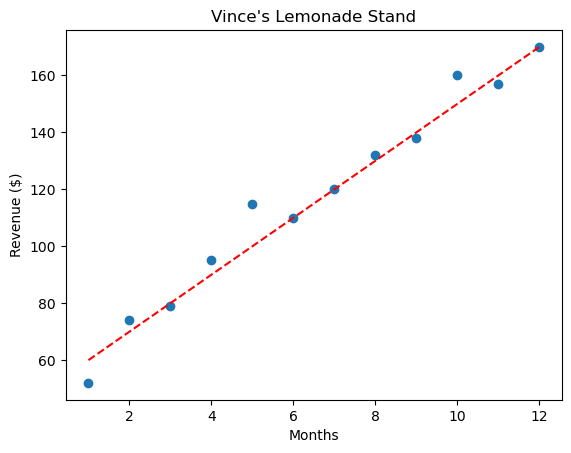

In [1]:
import matplotlib.pyplot as plt

plt.title("Vince's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 120, 132, 138, 160, 157, 170]

plt.plot(months, revenue, "o")

plt.plot(months, [((x * 10) + 50) for x in months], color="red", linestyle="--")

plt.show()

## Building a linear regression algorithm from scratch

First we must learn the following two terms:

### Gradient descent
Gradient descent is an optimization algorithm used in machine learning to minimize a cost function by iteratively moving towards the minimum value of the function. It is widely used in training models, particularly in the context of neural networks and linear regression.

### Convergence
Convergence in the context of gradient descent refers to the process of approaching the minimum value of the cost function over iterations. It is achieved when the updates to the parameters become sufficiently small, indicating that the algorithm has found a point where the cost function is minimized (or close to being minimized). Convergence is an important aspect because it signifies that the optimization process is nearing completion.

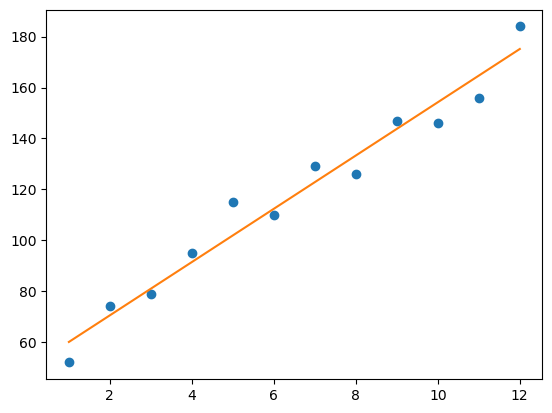

In [2]:
import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for _ in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return [b, m]


months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

## Using Sci-kit learn

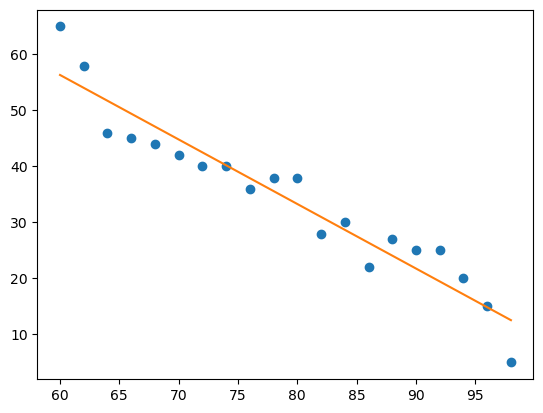

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')


# Create a Linear Regression model
line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predictions = line_fitter.predict(temperature)

plt.plot(temperature, sales_predictions)

plt.show()

## Boston Housing Dataset

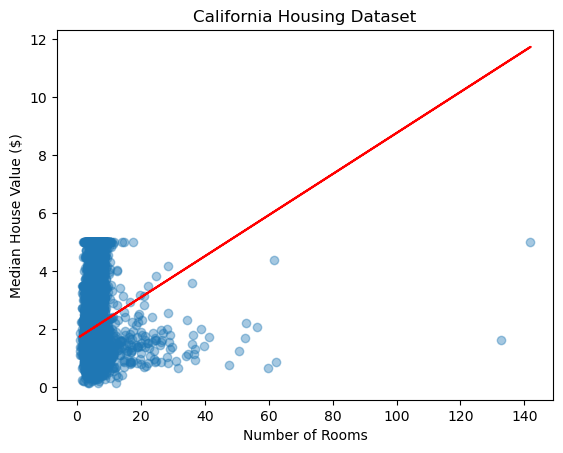

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Boston housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a DataFrame from the dataset
df = pd.DataFrame(data=housing.data, columns=housing.feature_names) # type: ignore

# Add target to DataFrame
df['MedHouseVal'] = housing.target # type: ignore

df.head()

# Set the x-values to the average number of rooms:
x = df[['AveRooms']]

# y-values are the prices:
y = df['MedHouseVal']

# Create a Linear Regression model
lf = LinearRegression()

# Fit the model on the data
lf.fit(x, y)

# Make predictions
y_predict = lf.predict(x)

# Plotting the line of best fit / least loss
plt.plot(x, y_predict, color='red')

# Plot the original data
plt.scatter(x, y, alpha=0.4)

# Add labels
plt.title("California Housing Dataset")
plt.xlabel("Number of Rooms")
plt.ylabel("Median House Value ($)")

# Show the plot
plt.show()

In [5]:

num_rooms = 4
prediction = lf.predict([[num_rooms]])[0]
print(f"A house with {num_rooms} rooms will cost ${prediction:.2f}m")

A house with 4 rooms will cost $1.97m


/home/vchapandrews/anaconda3/envs/machine-learning-practise/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
